### Dynamic Programming for Rob Cutting Problems

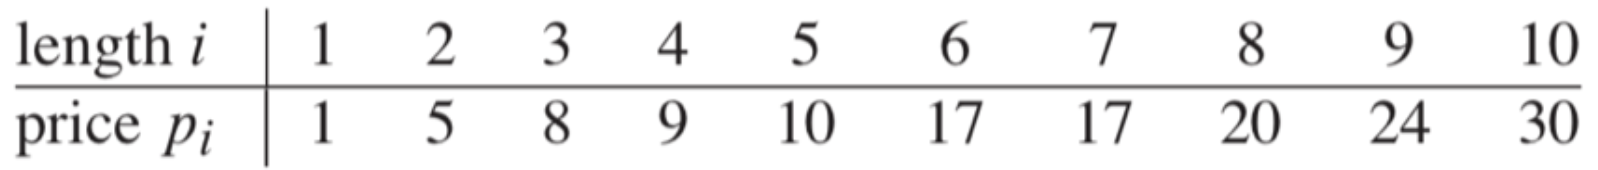

动态规划：钢管切割问题

In [83]:
original_price = [1,5,8,9,10,17,17,20,24,30]

In [3]:
from collections import defaultdict

In [12]:
price = defaultdict(int)

In [13]:
for i, p in enumerate(original_price):
    price[i+1] = p
assert price[1] == 1

In [16]:
#计算切割后得到的收入
def revenue(n):  
    return max(
        [price[n]] + [revenue(i) + revenue(n-i) for i in range(1,n) ]   
    )

In [18]:
r(12)

35

In [20]:
#以上解法的空间复杂度大，如果遇到数字多的情况下速度会很慢

In [21]:
solution = {}

In [22]:
def r(n):
    max_price, split_point = max(
    [(price[n],0)] + [(r(i) + r(n-i), i) for i in range(1,n)], key=lambda x:x[0]
    )
    
    solution[n] = (split_point,n-split_point)
    return max_price 

In [24]:
r(15)

43

In [68]:
solution
#有些部分进行了重复计算

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

In [30]:
def func_1(n):
    for i in range(n):
        print(i)

In [31]:
import time 
def call_time(func_1,arg):  #脚手架程序
    start = time.time()
    func_1(arg)
    print('used time:{}'.format(time.time()-start))
    
#python 是面向函数的语言，可以把函数作为参数传入

In [55]:
from functools import wraps 
function_called_time = defaultdict(int)

def get_call_time(func):
    @wraps(func)
    def _inner(arg):
        global function_called_time
        print(func.__name__)
        function_called_time[func.__name__] += 1
        result = func(arg)
        print('function call time is {}'.format(function_called_time[func.__name__]))
        return result  
    return _inner

In [56]:
func = get_call_time(func_1)

In [57]:
func.__name__

'func_1'

In [58]:
x = call_time(func_1,10)

func_1 = get_call_time(func_1)

print(func_1(10))


func_1
10
10
10
10
10
10
10
10
10
10
function call time is 1
used time:0.00039076805114746094
func_1
func_1
10
10
10
10
10
10
10
10
10
10
function call time is 3
function call time is 3
0


In [59]:
@get_call_time 
def func_1(n):
	"""
	@param n : is the number of customers
	@return int : the customers value point
	"""
	for i in range(n):
		print(n)
	return 0

help(func_1)

print(func_1(10))

Help on function func_1 in module __main__:

func_1(n)
    @param n : is the number of customers
    @return int : the customers value point

func_1
10
10
10
10
10
10
10
10
10
10
function call time is 4
0


In [61]:
def memo(func):
    cache = {}
    @wraps(func)
    def _wrap(n):
        if n in cache: result = cache[n]
        else:
            result = func(n)
            cache[n] = result 
        return result
    return _wrap

In [63]:
@memo 
def r(n):
    max_price, split_point = max(
    [(price[n],0)] + [(r(i) + r(n-i),i) for i in range(1,n)], key=lambda x: x[0]
    )
    solution[n] = (split_point, n- split_point)
    return max_price

In [65]:
r(221)

661

In [76]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

In [81]:
def not_cut(split):
    #0是没有切分的
    return split == 0 

#解析
def parse_solution(target_length,revenue_solution):
    #递归的出口
    left, right = revenue_solution[target_length]
    
    if not_cut(left): return [right]
    
    return  parse_solution(left,revenue_solution) + parse_solution(right,revenue_solution)


In [82]:
parse_solution(18,solution)

[2, 6, 10]

问题2: 编辑距离问题

In [87]:
def edit_distance(string1,string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    return min(
        [
            edit_distance(string1[:-1],string2) + 1, #string1 delete tail 
            edit_distance(string1,string2[:-1]) + 1, #string1 add tail of string2
            edit_distance(string1[:-1],string2[:-1]) + (0 if tail_s1== tail_s2 else 2),
        ]
    )

In [86]:
edit_distance('今天不想吃饭','明天不太想吃饭')

3

In [107]:

solution = {}

def edit_distance(string1,string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
          (edit_distance(string1[:-1],string2) + 1, 'Del {}'.format(tail_s1)),  #string1 delete tail 
          (edit_distance(string1,string2[:-1]) + 1, 'Add {}'.format(tail_s2))#string1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1],string2[:-1]) + 0,'')
    else:
        both_forward = (edit_distance(string1[:-1],string2[:-1]) + 1,'SUB {} ==> {}'.format(tail_s1,tail_s2))
        
    candidates.append(both_forward)
    
    min_distance , operation = min(candidates,key=lambda x: x[0])
    
    solution[(string1,string2)] = operation
    
    return min_distance 


In [108]:
edit_distance('Beijing','beijin')

2

In [109]:
solution

{('B', 'b'): 'SUB B ==> b',
 ('B', 'be'): 'Add e',
 ('B', 'bei'): 'Add i',
 ('B', 'beij'): 'Add j',
 ('B', 'beiji'): 'Add i',
 ('B', 'beijin'): 'Add n',
 ('Be', 'b'): 'Del e',
 ('Be', 'be'): '',
 ('Be', 'bei'): 'Add i',
 ('Be', 'beij'): 'Add j',
 ('Be', 'beiji'): 'Add i',
 ('Be', 'beijin'): 'Add n',
 ('Bei', 'b'): 'Del i',
 ('Bei', 'be'): 'Del i',
 ('Bei', 'bei'): '',
 ('Bei', 'beij'): 'Add j',
 ('Bei', 'beiji'): 'Add i',
 ('Bei', 'beijin'): 'Add n',
 ('Beij', 'b'): 'Del j',
 ('Beij', 'be'): 'Del j',
 ('Beij', 'bei'): 'Del j',
 ('Beij', 'beij'): '',
 ('Beij', 'beiji'): 'Add i',
 ('Beij', 'beijin'): 'Add n',
 ('Beiji', 'b'): 'Del i',
 ('Beiji', 'be'): 'Del i',
 ('Beiji', 'bei'): 'Del i',
 ('Beiji', 'beij'): 'Del i',
 ('Beiji', 'beiji'): '',
 ('Beiji', 'beijin'): 'Add n',
 ('Beijin', 'b'): 'Del n',
 ('Beijin', 'be'): 'Del n',
 ('Beijin', 'bei'): 'Del n',
 ('Beijin', 'beij'): 'Del n',
 ('Beijin', 'beiji'): 'Del n',
 ('Beijin', 'beijin'): '',
 ('Beijing', 'b'): 'Del g',
 ('Beijing', 'be'):